# Code for Stochatic parameter shift rule with noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqix import *
import stoc.bases
import stoc.fishers
import stoc.stocf

In [2]:
# Pauli matrices # from tqix
sx = sigmax()
sy = sigmay()
sz = sigmaz()
si = eyex(2)
u = obasis(2,0)
d = obasis(2,1)

In [ ]:
# Define colective Pauli matrices and GHZ state

jx = (tensorx(sx,si,si)+tensorx(si,sx,si)+tensorx(si,si,sx))
jy = (tensorx(sy,si,si)+tensorx(si,sy,si)+tensorx(si,si,sy))
jz = (tensorx(sz,si,si)+tensorx(si,sz,si)+tensorx(si,si,sz))

psi = 1./np.sqrt(2)*(tensorx(u,u,u)+tensorx(d,d,d))
rho0 = psi @ daggx(psi)

jopers = [jx,jy,jz]
thetas = [np.pi/10,np.pi/10,np.pi/10]

ts = np.linspace(0.001,4,200)
y = 0.3 # decay rate
bounds = []

for t in ts:
    mu = (np.pi/20)/t    
    bound = stoc.fishers.qfim_bound(stoc.stocf.grad_stoc,
                         psi,jopers,thetas,t,mu,y)
    bounds.append(bound)                                

    
#save
np.savetxt('data/noise03_stoc.out', np.real(bounds), delimiter=',')

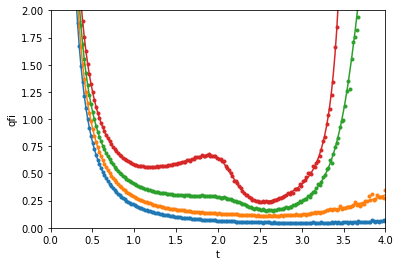

In [4]:
cmap = plt.get_cmap("tab10")
ts = np.linspace(0.001,4,200)

y10 = 7/5400. * (50/ts**2 + 3*np.pi**2/np.sin(ts*np.sqrt(3)/10.*np.pi)**2)

plt.plot(ts,noise0, color=cmap(0))
plt.plot(ts,noise01,color=cmap(1))
plt.plot(ts,noise02,color=cmap(2))
plt.plot(ts,noise03,color=cmap(3))

plt.scatter(ts,noise0_stoc,marker='.',color=cmap(0))
plt.scatter(ts,noise01_stoc,marker='.',color=cmap(1))
plt.scatter(ts,noise02_stoc,marker='.',color=cmap(2))
plt.scatter(ts,noise03_stoc,marker='.',color=cmap(3))

plt.xlabel("t")
plt.ylabel("qfi")
plt.ylim(0,2)
plt.xlim(0,4)
plt.savefig('data/fig_noise.eps', format = 'eps', dpi=600)
plt.show()

In [3]:
#call file to plot above figure
noise0 = np.loadtxt('data/noise0.out',delimiter=',')
noise01 = np.loadtxt('data/noise01.out',delimiter=',')
noise02 = np.loadtxt('data/noise02.out',delimiter=',')
noise03 = np.loadtxt('data/noise03.out',delimiter=',')

noise0_stoc = np.loadtxt('data/noise0_stoc.out',delimiter=',')
noise01_stoc = np.loadtxt('data/noise01_stoc.out',delimiter=',')
noise02_stoc = np.loadtxt('data/noise02_stoc.out',delimiter=',')
noise03_stoc = np.loadtxt('data/noise03_stoc.out',delimiter=',')